In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helper import Helper as help
import ast

In [2]:
sparse_irrational_data = pd.read_csv('../sparse_lam_data/j_sparseirrational_dist.csv')
sparse_gaussian_data = pd.read_csv('../sparse_lam_data/j_sparsenorm_dist.csv')
sparse_rademacher_data = pd.read_csv('../sparse_lam_data/j_sparserademacher_dist.csv')
print(sparse_irrational_data.head())
data_list = [sparse_irrational_data, sparse_gaussian_data, sparse_rademacher_data]

    N     p  Lambda    Time    Energy  std_Time  std_Energy  \
0  25  0.30       1  16.940 -0.611275  5.142995    0.078894   
1  25  0.40       1  16.887 -0.610252  4.985602    0.079134   
2  25  0.50       1  15.969 -0.602970  4.882626    0.077597   
3  25  0.75       1  13.819 -0.571237  4.283018    0.083525   
4  25  0.90       1   9.421 -0.502137  3.197461    0.094389   

                                            log_time  avg_log_time  
0  [1.255272505103306, 1.255272505103306, 1.17609...      1.206696  
1  [1.3424226808222062, 1.146128035678238, 1.3424...      1.207149  
2  [1.2304489213782739, 1.1760912590556813, 1.0, ...      1.180799  
3  [1.2041199826559248, 1.2304489213782739, 1.278...      1.117567  
4  [1.0413926851582251, 1.1139433523068367, 1.0, ...      0.946779  


In [3]:
names = ['sparse_irrational', 'sparse_gaussian', 'sparse_rademacher']

rel_alphas = []
gr_alphas = []

i = 0
print("Reluctant: \n")
for data in data_list:
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == -1) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        rel_alphas.append(a)
        print(names[i], "P = ", p, ": ", a)
    i += 1

i = 0
print("\nGreedy: \n")
for data in data_list:
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == 0) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        gr_alphas.append(a)
        print(names[i], "P = ", p, ": ", a)
    i += 1

Reluctant: 

sparse_irrational P =  0.3 :  2.008650995189576
sparse_irrational P =  0.4 :  1.9887413074901348
sparse_irrational P =  0.5 :  2.006703300888281
sparse_irrational P =  0.6 :  1.9912029522656745
sparse_irrational P =  0.7 :  1.9809078448184916
sparse_irrational P =  0.75 :  1.9657170145168712
sparse_irrational P =  0.8 :  1.9676401249562114
sparse_irrational P =  0.9 :  1.8778353845679363
sparse_gaussian P =  0.1 :  2.0859951900925457
sparse_gaussian P =  0.2 :  2.0922883572282354
sparse_gaussian P =  0.25 :  2.096674742273234
sparse_gaussian P =  0.3 :  2.090951953907229
sparse_gaussian P =  0.4 :  2.101961040449205
sparse_gaussian P =  0.5 :  2.0976609636529213
sparse_gaussian P =  0.6 :  2.091229270571972
sparse_gaussian P =  0.7 :  2.079835704884851
sparse_gaussian P =  0.75 :  2.0538101320373583
sparse_gaussian P =  0.8 :  2.0294910302272546
sparse_gaussian P =  0.9 :  1.8584274101188247
sparse_rademacher P =  0.1 :  1.681422470761452
sparse_rademacher P =  0.2 :  1.65

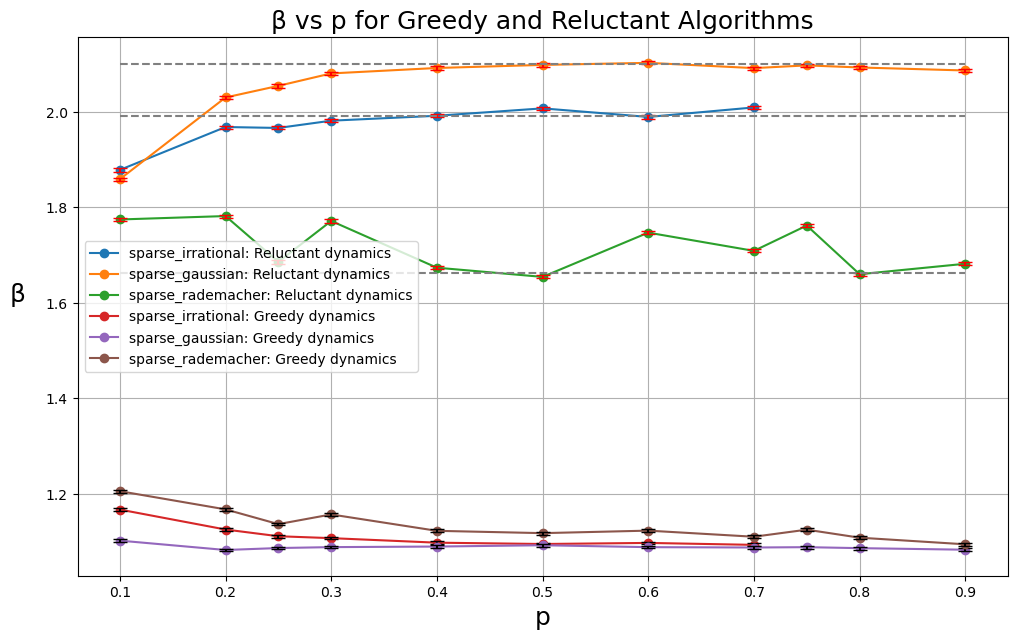

In [4]:
names = ['sparse_irrational', 'sparse_gaussian', 'sparse_rademacher']
colors = ['blue', 'red', 'green']

rel_alphas = []
rel_err = []
gr_alphas = []
gr_err = []

fig, axes = plt.subplots(1, 1, figsize=(12, 7))

i = 0
# print("Reluctant: \n")
for data in data_list:
    rel_alphas = []
    rel_err = []
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == -1) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        rel_alphas.append(a)
        rel_err.append(a_err)
    axes.plot(1-p_vals, rel_alphas, marker = 'o', label=f'{names[i]}: Reluctant dynamics')
    axes.errorbar(1-p_vals, rel_alphas, yerr=rel_err, marker=' ', linestyle=' ', capsize=5, color='red') # label='Reluctant Error'
    i += 1

i = 0
# print("\nGreedy: \n")
for data in data_list:
    gr_alphas = []
    gr_err = []
    p_vals = np.sort(data['p'].unique())
    for p in p_vals:
        df = data[(data['Lambda'] == 0) & (data['p'] == p)]
        a, a_err = help.get_alpha_from_log_time(df)
        gr_alphas.append(a)
        gr_err.append(a_err)
    axes.plot(1-p_vals, gr_alphas, marker = 'o', label=f'{names[i]}: Greedy dynamics')
    axes.errorbar(1-p_vals, gr_alphas, yerr=gr_err, marker=' ', linestyle=' ', capsize=5, color='black') # label = 'Greedy Error'
    i += 1
# Gaussian
axes.hlines(2.0988161482037477, 0.1, 0.9, color = 'gray', linestyles = '--')
# irrational
axes.hlines(1.989911570595115, 0.1, 0.9, color = 'gray', linestyles = '--')
# rademacher
axes.hlines(1.66295077558983, 0.1, 0.9, color = 'gray', linestyles = '--')

axes.set_xlabel('p', fontsize=18)
axes.set_ylabel('β', fontsize=18, labelpad=20, rotation = 0)
axes.grid()
axes.set_title('β vs p for Greedy and Reluctant Algorithms', fontsize = 18)
axes.legend()
